# Read Image Data from a URL

In [2]:
from matplotlib.image import imread

img = imread('test_pic/n03384352_27.jpg')
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(375, 500, 3)


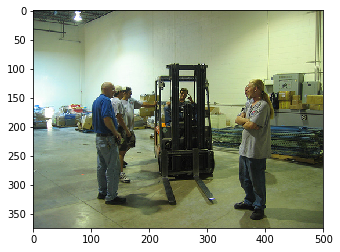

In [19]:
plt.imshow(img)

In [29]:
seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)) # crop images from each side by 0 to 16px (randomly chosen)
    #iaa.Fliplr(1), # horizontally flip 50% of the images
    #iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
])

In [30]:
images_aug = seq.augment_image(img)

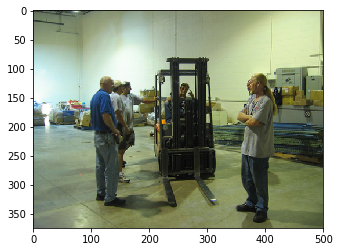

In [31]:
plt.imshow(images_aug)

# Image with bounding box

In [103]:
import imgaug as ia
from imgaug import augmenters as iaa

ia.seed(1)

image = ia.quokka(size=(256, 256))
bbs = ia.BoundingBoxesOnImage([
    ia.BoundingBox(x1=65, y1=100, x2=200, y2=150),
    ia.BoundingBox(x1=150, y1=80, x2=200, y2=130)
], shape=image.shape)

seq = iaa.Sequential([
    iaa.Multiply((1.2, 1.5)), # change brightness, doesn't affect BBs
    iaa.Affine(
        translate_px={"x": 40, "y": 60},
        scale=(0.5, 0.7)
    ) # translate by 40/60px on x/y axis, and scale to 50-70%, affects BBs
    
])

# Make our sequence deterministic.
# We can now apply it to the image and then to the BBs and it will
# lead to the same augmentations.
# IMPORTANT: Call this once PER BATCH, otherwise you will always get the
# exactly same augmentations for every batch!
seq_det = seq.to_deterministic()

# Augment BBs and images.
# As we only have one image and list of BBs, we use
# [image] and [bbs] to turn both into lists (batches) for the
# functions and then [0] to reverse that. In a real experiment, your
# variables would likely already be lists.
image_aug = seq_det.augment_images([image])[0]
bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]

# print coordinates before/after augmentation (see below)
# use .x1_int, .y_int, ... to get integer coordinates
for i in range(len(bbs.bounding_boxes)):
    before = bbs.bounding_boxes[i]
    after = bbs_aug.bounding_boxes[i]
    print("BB %d: (%.4f, %.4f, %.4f, %.4f) -> (%.4f, %.4f, %.4f, %.4f)" % (
        i,
        before.x1, before.y1, before.x2, before.y2,
        after.x1, after.y1, after.x2, after.y2)
    )

# image with BBs before/after augmentation (shown below)
image_before = bbs.draw_on_image(image, thickness=2)
image_after = bbs_aug.draw_on_image(image_aug, thickness=2, color=[0, 0, 255])

BB 0: (65.0000, 100.0000, 200.0000, 150.0000) -> (50.9255, 173.6269, 119.0297, 198.8507)
BB 1: (150.0000, 80.0000, 200.0000, 130.0000) -> (50.9255, 163.5374, 76.1493, 188.7612)


In [64]:
import imgaug as ia
from imgaug import augmenters as iaa
image = ia.quokka(size=(256, 256))

In [66]:
print((image)
plt.imshow(image)

TypeError: 'tuple' object is not callable

# on custom data

In [44]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import imgaug as ia
from imgaug import augmenters as iaa

In [45]:
image = imread('test_pic/n03384352_27.jpg')
#image = ia.quokka(size=(256, 256))

In [48]:
x1= [204,87,317,338]
bbs = ia.BoundingBoxesOnImage([
    ia.BoundingBox(x1[0],x1[1],x1[2],x1[3]),
], shape=image.shape)

seq1 = iaa.Sequential([
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8) )
    ])

seq_det1 = seq1.to_deterministic()

In [51]:
image_aug1 = seq_det1.augment_images([image])[0]
bbs_aug1 = seq_det1.augment_bounding_boxes([bbs])[0]
print(bbs_aug)
print(bbs_aug1)

BoundingBoxesOnImage([BoundingBox(x1=126.0529, y1=56.9609, x2=269.1944, y2=363.1365, label=None)], shape=(375, 500, 3))
BoundingBoxesOnImage([BoundingBox(x1=160.3479, y1=101.8222, x2=330.4358, y2=365.3746, label=None)], shape=(375, 500, 3))


In [52]:
image_before = bbs.draw_on_image(image, thickness=2)

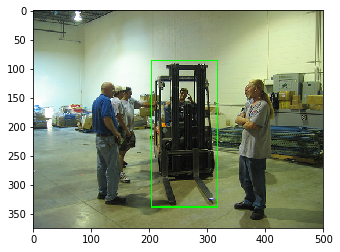

In [53]:
plt.imshow(image_before)

In [59]:
image_after = bbs_aug1.draw_on_image(image_aug1, thickness=2, color=[0, 0, 255])

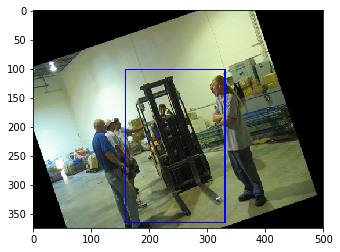

In [60]:
plt.imshow(image_after)

# Read image as numpy array using different technique

In [14]:
from PIL import Image
import numpy as np

def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

In [15]:
img2 = load_image('test_pic/n03384352_27.jpg')

In [16]:
print(type(img2))

<class 'numpy.ndarray'>


In [17]:
images = np.array(
    [ia.quokka(size=(64, 64)) for _ in range(32)],
    dtype=np.uint8
)

In [18]:
print(type(images))
print(images.shape)

<class 'numpy.ndarray'>
(32, 64, 64, 3)


# Testing

In [114]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np

ia.seed(1)

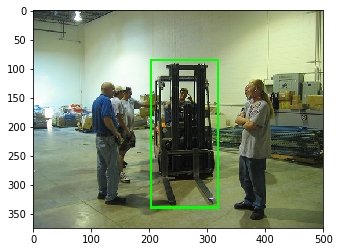

In [151]:
image = imread('test_pic/n03384352_27.jpg')
#image = ia.quokka(size=(256, 256))
x1= [204,87,317,338]
bbs = ia.BoundingBoxesOnImage([
    ia.BoundingBox(x1[0],x1[1],x1[2],x1[3]),
], shape=image.shape)
image_before = bbs.draw_on_image(image, thickness=4)
plt.imshow(image_before)

In [137]:
aug_crop = iaa.Crop(percent=(0,0.3)) # random crops
aug_guassianblur  = iaa.GaussianBlur(sigma=(0,0.5))  ##Small gaussian blur with random sigma between 0 and 0.5.
aug_contrast = iaa.ContrastNormalization((0.75, 1.5))# Strengthen or weaken the contrast in each image.

In [ ]:
### To restrict bounding boxes within the image

GREEN = [0, 255, 0]
ORANGE = [255, 140, 0]
RED = [255, 0, 0]

# Pad image with a 1px white and (BY-1)px black border
def pad(image, by):
    if by <= 0:
        return image
    image_border1 = np.pad(
        image, ((1, 1), (1, 1), (0, 0)),
        mode="constant", constant_values=255
    )
    image_border2 = np.pad(
        image_border1, ((by-1, by-1), (by-1, by-1), (0, 0)),
        mode="constant", constant_values=0
    )

    return image_border2

# Draw BBs on an image
# and before doing that, extend the image plane by BORDER pixels.
# Mark BBs inside the image plane with green color, those partially inside
# with orange and those fully outside with red.
def draw_bbs(image, bbs, border):
    image_border = pad(image, border)
    for bb in bbs.bounding_boxes:
        if bb.is_fully_within_image(image.shape):
            color = GREEN
        elif bb.is_partly_within_image(image.shape):
            color = ORANGE
        else:
            color = RED
        image_border = bb.shift(left=border, top=border)\
                         .draw_on_image(image_border, thickness=5, color=color)

    return image_border


BoundingBoxesOnImage([BoundingBox(x1=111.5486, y1=34.2105, x2=259.8425, y2=364.4737, label=None)], shape=(375, 500, 3))
[BoundingBox(x1=111.5486, y1=34.2105, x2=259.8425, y2=364.4737, label=None)]
[111.5485564304462, 34.21052631578947, 259.84251968503935, 364.4736842105263]


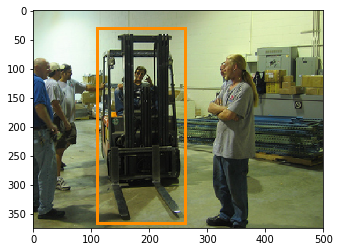

In [231]:
###crop images
aug_crop_det = aug_crop.to_deterministic()
image_aug_crop = aug_crop_det.augment_image(image)  ### final_image
bbs_aug_crop = aug_crop_det.augment_bounding_boxes([bbs])[0]
image_after_crop = bbs_aug_crop.remove_out_of_image().cut_out_of_image().draw_on_image(image_aug_crop, thickness=5, color=[255, 140, 0])
plt.imshow(image_after_crop)
#print(bbs_aug_crop)
#image_before = draw_bbs(image, bbs, 100)
#image_after1 = draw_bbs(image_aug_crop, bbs_aug_crop, 100)
#image_after2 = draw_bbs(image_aug_crop, bbs_aug_crop.remove_out_of_image(), 100)
image_after3 = draw_bbs(image_aug_crop, bbs_aug_crop.remove_out_of_image().cut_out_of_image(), 100)
print(bbs_aug_crop)
final_bb_crop = bbs_aug_crop.remove_out_of_image().cut_out_of_image()
##########*******Extract an attribute from a list ***********###########
#dir(final_bb_crop.bounding_boxes)
print(final_bb_crop.bounding_boxes)
bb_crop_list = [final_bb_crop.bounding_boxes[0].x1,final_bb_crop.bounding_boxes[0].y1,final_bb_crop.bounding_boxes[0].x2,final_bb_crop.bounding_boxes[0].y2]
#print(bbs_aug_crop.remove_out_of_image().cut_out_of_image())
#plt.imshow(image_after3)
#dir(final_bb_crop.bounding_boxes)
print(bb_crop_list)

BoundingBoxesOnImage([BoundingBox(x1=204.0000, y1=87.0000, x2=317.0000, y2=338.0000, label=None)], shape=(375, 500, 3))


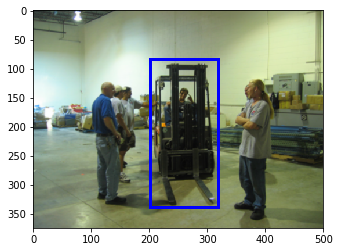

In [121]:
###guassian blur
aug_blur_det = aug_guassianblur.to_deterministic()
image_aug_blur = aug_blur_det.augment_image(image)
bbs_aug_blur = aug_blur_det.augment_bounding_boxes([bbs])[0]
image_after_blur = bbs_aug_blur.draw_on_image(image_aug_blur, thickness=5, color=[0, 0, 255])
plt.imshow(image_after_blur)
print(bbs_aug_blur)

BoundingBoxesOnImage([BoundingBox(x1=404.0000, y1=87.0000, x2=517.0000, y2=338.0000, label=None)], shape=(375, 500, 3))


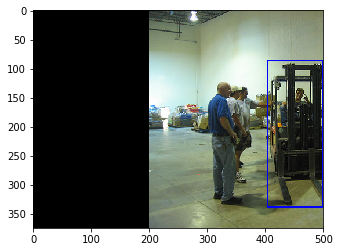

In [230]:
###affine transformation
aug_affine_seq= iaa.Affine(translate_px={"x": 200})
#seq_det = seq.to_deterministic()
aug_affine_det = aug_affine_seq.to_deterministic()
image_aug_affine = aug_affine_det.augment_image(image)
bbs_aug_affine = aug_affine_det.augment_bounding_boxes([bbs])[0]
image_after_affine = bbs_aug_affine.remove_out_of_image().cut_out_of_image().draw_on_image(image_aug_affine, thickness=2, color=[0, 0, 255])
plt.imshow(image_after_affine)
print(bbs_aug_affine)
plt.imshow(image_after_affine)

In [146]:
GREEN = [0, 255, 0]
ORANGE = [255, 140, 0]
RED = [255, 0, 0]

# Pad image with a 1px white and (BY-1)px black border
def pad(image, by):
    if by <= 0:
        return image
    image_border1 = np.pad(
        image, ((1, 1), (1, 1), (0, 0)),
        mode="constant", constant_values=255
    )
    image_border2 = np.pad(
        image_border1, ((by-1, by-1), (by-1, by-1), (0, 0)),
        mode="constant", constant_values=0
    )

    return image_border2

# Draw BBs on an image
# and before doing that, extend the image plane by BORDER pixels.
# Mark BBs inside the image plane with green color, those partially inside
# with orange and those fully outside with red.
def draw_bbs(image, bbs, border):
    image_border = pad(image, border)
    for bb in bbs.bounding_boxes:
        if bb.is_fully_within_image(image.shape):
            color = GREEN
        elif bb.is_partly_within_image(image.shape):
            color = ORANGE
        else:
            color = RED
        image_border = bb.shift(left=border, top=border)\
                         .draw_on_image(image_border, thickness=5, color=color)

    return image_border

# Define example image with three small square BBs next to each other.
# Augment these BBs by shifting them to the right.
#image = ia.quokka(size=(256, 256))
'''bbs = ia.BoundingBoxesOnImage([
    ia.BoundingBox(x1=25, x2=75, y1=25, y2=75),
    ia.BoundingBox(x1=100, x2=150, y1=25, y2=75),
    ia.BoundingBox(x1=175, x2=225, y1=25, y2=75)
], shape=image.shape)'''

#seq = iaa.Affine(translate_px={"x": 120})
#seq_det = seq.to_deterministic()

#image_aug = seq_det.augment_images([image])[0]
#bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]

# Draw the BBs (a) in their original form, (b) after augmentation,
# (c) after augmentation and removing those fully outside the image,
# (d) after augmentation and removing those fully outside the image and
# cutting those partially inside the image so that they are fully inside.
image_before = draw_bbs(image, bbs, 100)
image_after1 = draw_bbs(image_aug_affine, bbs_aug_affine, 100)
image_after2 = draw_bbs(image_aug_affine, bbs_aug_affine.remove_out_of_image(), 100)
image_after3 = draw_bbs(image_aug_affine, bbs_aug_affine.remove_out_of_image().cut_out_of_image(), 100)
print(bbs_aug_affine)
print(bbs_aug_affine.remove_out_of_image().cut_out_of_image())

BoundingBoxesOnImage([BoundingBox(x1=404.0000, y1=87.0000, x2=517.0000, y2=338.0000, label=None)], shape=(375, 500, 3))
BoundingBoxesOnImage([BoundingBox(x1=404.0000, y1=87.0000, x2=500.0000, y2=338.0000, label=None)], shape=(375, 500, 3))


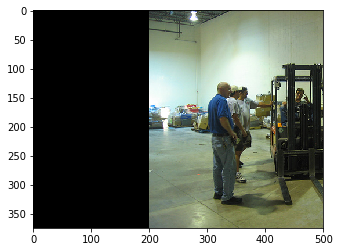

In [150]:
plt.imshow(image_aug_affine)